<a href="https://colab.research.google.com/github/kk00b/blogging/blob/master/Jiyeon_kim_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리, 패키지 설치
 Section

In [105]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [106]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [107]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [ ]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 66kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=e6510590fdaf8a6397d652dc540fc6170d38b88044aa9587867a570217fa5e8f
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.6MB/s 


In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 2.6MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463905 sha256=e6326c269aa2181dac27c5dd2d06b658c7f014c1e0f65c6ba8008bff61f21747
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


# 데이터 전처리 및 특성공학

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/investments.csv', encoding = "ISO-8859-1") # 인코딩 오류로 encoding = "ISO-8859-1" 추가

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54254,54255,54256,54257,54258,54259,54260,54261,54262,54263,54264,54265,54266,54267,54268,54269,54270,54271,54272,54273,54274,54275,54276,54277,54278,54279,54280,54281,54282,54283,54284,54285,54286,54287,54288,54289,54290,54291,54292,54293
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine,/organization/club-domains,/organization/fox-networks,/organization/0-6-com,/organization/004-technologies,/organization/01games-technology,/organization/1-2-3-listo,/organization/1-4-all,/organization/1-800-dentist,/organization/1-800-doctors,/organization/1-618-technology,/organization/10-minutes-with,/organization/10-20-media,/organization/1000-corks,/organization/1000-markets,/organization/1000jobboersen-de,/organization/1000memories,/organization/1000museums-com,/organization/1001-menus,/organization/1006-tv,/organization/100du-tv,/organization/100e-com,/organization/100health,/organization/100plus,/organization/1010data,/organization/10°north,/organization/10bestthings,/organization/10sec,/organization/10seconds-software,/organization/10six,/organization/10x-technologies,/organization/10x10-room,/organization/115-network-disks,/organization/117go,/organization/11i-solutions,/organization/fitfrnd-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine,.Club Domains,.Fox Networks,0-6.com,004 Technologies,01Games Technology,"1,2,3 Listo",1-4 All,1-800-DENTIST,1-800-DOCTORS,1.618 Technology,10 Minutes With,10-20 Media,1000 Corks,1000 Markets,1000jobboersen.de,1000memories,1000museums.com,1001 Menus,1006.tv,100du.tv,100e.com,100health,100Plus,1010data,10°North,10BestThings,10sec,10seconds Software,10Six,10X Technologies,10X10 Room,115 network disks,117go,11i Solutions,12 Labs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN,http://nic.club/,http://www.dotfox.com,http://www.0-6.com,http://004gmbh.de/en/004-interact,http://www.01games.hk/,http://www.123listo.com,NaN,http://www.1800dentist.com,http://1800doctors.com,NaN,http://10minuteswith.com,http://www.10-20media.com,http://1000corks.com,http://www.1000markets.com,http://www.1000jobboersen.de,http://1000memories.com,http://www.1000museums.com,http://1001menus.com,http://www.1006.tv/,http://www.100du.com,http://www.100e.com,http://www.redoxengine.com,http://www.100plus.com,http://www.1010data.com,NaN,http://10bestthings.com,http://10s.ec/,http://www.10secondsSoftware.com,http://10sixenergy.com,http://10xtechnologies.com,http://10x10room.com,http://www.115.com/,http://117go.com,http://www.11isolutions.com,http://www.12labs.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|,|Software|,|Advertising|,|Curated Web|,|Software|,|Games|,|E-Commerce|,|Entertainment|Games|Software|,|Health and Wellness|,|Health and Wellness|,|Real Estate|,|Education|,|E-Commerce|,|Search|,|Marketplaces|Art|E-Commerce|,|Curated Web|,|Curated Web|,|Curated Web|,|Local Businesses|Restaurants|,|Media|Games|,|Hospitality|,|Education|,|Health Care Information Technology|,|Analytics|,|Software|,|Fashion|,|Curated Web|,|Social Commerce|E-Commerce|Mobile Commerce|,|Mobility|Enterprise Software|Software|,|

In [2]:
target = 'status' # 타겟 컬럼 지정 후 클래스 갯수 세기

df[target].value_counts(normalize=True)

operating    0.869192
acquired     0.076718
closed       0.054089
Name: status, dtype: float64

operating/acquired의 비중이 94프로가 넘는 불균형 데이터이다.

## 전처리

In [3]:
print(df.shape)
# print(df.isnull().sum()) 

# 4856개의 NAN값 row 제거(데이터프레임 끝 부분), 국가 외 지역 컬럼 제거,
# 날짜 제거, status NAN값 제거

df = df[~df.name.isna()] # name컬럼의 값이 NaN인 행 제거(4856)

drop_this_columns = ['homepage_url', 'permalink', 'state_code', 'region', 'city', 'founded_month', \
                     'founded_quarter','founded_year', 'name'] # 고유값인 name,url, permalink와 NaN값이 많은 세부지역정보, 창립 날짜 제거
df = df.drop(drop_this_columns,axis=1)

(54294, 39)


In [4]:
df = df[~df.status.isna()] # status컬럼의 값이 NaN인 행 제거

In [5]:
df = df.drop('category_list', axis=1) # 범주화가 어려운 회사 사업분야 리스트를 삭제

In [6]:
df.dtypes

 market                  object
 funding_total_usd       object
status                   object
country_code             object
funding_rounds          float64
founded_at               object
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
dtype: object

## 특성공학

In [7]:
# 창립날부터 첫번째 펀딩까지 기간 컬럼 만들기


import numpy as np

# 창립 날짜가 NaN인 경우 첫 펀딩 날짜로 결측치 채워주기
df['founded_at'] = np.where(pd.notnull(df['founded_at']) == True, df['founded_at'], df['first_funding_at'])

def to_dt(column):
  global df
  """
  Out of bounds nanosecond timestamp: 1636-09-08 00:00:00 에러 발생
  1950년대 이전 데이터 제거
  """
  df = df[df[column] > '1949-12-31']
  # datetime 변수로 변환
  df[column] = pd.to_datetime(df[column],format='%Y-%m-%d', errors='raise')
  return df

# 날짜 컬럼에 함수 적용
to_dt('founded_at')
to_dt('first_funding_at')
to_dt('last_funding_at')

# 창립날부터 첫번째 펀딩까지 기간 컬럼 만들기
df['days_for_funding'] = df['first_funding_at'] - df['founded_at'] 

df['founded_at'] = str(df['founded_at'])
df['first_funding_at'] = str(df['first_funding_at'])
df['last_funding_at'] = str(df['last_funding_at'])

In [8]:
# 총 펀딩 횟수 컬럼 만들기
# 펀딩 종류들로 리스트 생성
fundings = ['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant','private_equity',
            'post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding','round_A','round_B','round_C',
            'round_D','round_E','round_F','round_G','round_H',]

df['n_fundings'] = 0 
df = df.drop(['funding_rounds'], axis = 1) # 총 펀딩횟수와 중복되는 funding rounds 제거

for i in fundings:
  df.loc[df[i] != 0, 'n_fundings'] += 1  # df[펀딩종류컬럼]의 값이 0이 아닌 경우 n_fundings 컬럼에 +1 하는 코드

In [9]:
df.T

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,...,49397,49398,49399,49400,49401,49402,49403,49404,49405,49406,49407,49408,49409,49410,49411,49413,49414,49415,49416,49417,49418,49419,49420,49421,49422,49423,49424,49425,49426,49427,49428,49429,49430,49431,49432,49433,49434,49435,49436,49437
market,News,Games,Publishing,Electronics,Tourism,Advertising,Curated Web,Software,Games,E-Commerce,Software,Health and Wellness,Health and Wellness,Real Estate,Education,E-Commerce,Search,Marketplaces,Curated Web,Curated Web,Curated Web,Restaurants,Media,Hospitality,Education,Health Care Information Technology,Analytics,Software,Fashion,Curated Web,Mobile Commerce,Mobility,Electronics,Biotechnology,Software,Education,Social Travel,Enterprise Software,Sports,Sports,...,NaN,Apps,E-Commerce,Entertainment,Music,NaN,Messaging,Software,Mobile,Software,Polling,News,Social Network Media,Medical Devices,Mobile,Hardware + Software,Automotive,E-Commerce,Software,Hardware,Biotechnology,Biotechnology,Biotechnology,Web Hosting,Testing,Crowdsourcing,MicroBlogging,Pharmaceuticals,Technology,Biotechnology,Software,Biotechnology,Biotechnology,E-Commerce,Biotechnology,Education,Enterprise Software,Web Development,Games,Enterprise Software
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000","49,12,393","20,00,000",-,"41,250","40,000",-,-,"17,50,000",-,"44,00,000","20,50,000","40,000","5,00,000",-,"25,35,000","49,62,651","40,59,079","1,00,00,000","30,00,000","45,00,000","4,20,000","12,50,000","3,50,00,000",-,"50,000","16,00,000","1,00,000",-,"30,00,000","77,500",-,"2,00,00,000","18,00,000",-,-,...,"15,698","6,50,000","15,15,151","5,52,00,000","2,00,00,000","3,87,794","2,50,000","6,51,000","35,00,000","1,90,000","1,00,000","8,70,000","38,45,100","5,57,50,000",-,"33,84,225","8,00,000","75,000","6,66,154","1,20,39,999",-,"22,57,464","5,62,00,000",-,-,-,"38,05,520","1,30,00,000","86,65,50,786","2,50,00,000","1,47,50,000","3,42,75,015","1,54,19,877","15,10,500","26,86,600","3,20,000","15,87,301","97,398","93,00,000","4,50,00,000"
status,acquired,operating,operating,operating,operating,closed,operating,operating,operating,operating,operating,operating,operating,operating,operating,operating,operating,acquired,operating,acquired,operating,operating,operating,operating,operating,operating,acquired,operating,operating,closed,operating,operating,operating,operating,operating,operating,operating,operating,operating,operating,...,operating,operating,operating,acquired,operating,operating,operating,operating,operating,operating,operating,operating,acquired,operating,closed,acquired,closed,operating,operating,operating,operating,closed,operating,operating,operating,operating,operating,operating,operating,operating,operating,operating,closed,operating,operating,operating,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA,ARG,NaN,USA,HKG,CHL,USA,USA,USA,USA,GBR,USA,USA,NaN,DEU,USA,USA,FRA,CHN,NaN,CHN,USA,USA,USA,CAN,USA,NaN,AUS,USA,USA,USA,NaN,CHN,USA,NaN,USA,...,NaN,ISR,CHN,USA,RUS,USA,USA,DEU,NOR,USA,NaN,USA,DNK,USA,GBR,FRA,USA,USA,USA,USA,USA,USA,CAN,NaN,USA,GBR,ESP,USA,USA,USA,GBR,USA,MYS,USA,AUT,GBR,CHN,HRV,NaN,USA
founded_at,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-0

In [10]:
df['total_fundings'] = 0
for i in fundings:
  df.loc[df[i] != 0, 'total_fundings'] += df[i] # df[펀딩종류컬럼]의 값이 0이 아닌 경우 total_fundings 컬럼에 펀딩종류별 금액 더하기



In [11]:
# funding_total_usd의 값이 펀딩 종류별로 더한 값과 다른 경우가 있어 해당 컬럼 제거
df = df.drop(' funding_total_usd ', axis=1)

In [12]:
df.rename(columns={' market ' : 'market'}, inplace=True) # market 컬럼의 공백 제거하여 이름 바꾸기

In [13]:
# status acquired, operating 인 경우 active 로 매핑
df['status'] = df['status'].replace(['acquired'],'active')
df['status'] = df['status'].replace(['operating'],'active')


In [14]:
df['status'] = df['status'].replace(['active'],1) # active -> 1
df['status'] = df['status'].replace(['closed'],0) # closed -> 0 으로 변환

In [15]:
df = df[df['total_fundings'] != 0] # total_fundings이 0이 아닌 데이터만 남기기


In [16]:
df['days_for_funding'] = df['days_for_funding'].astype(str)  # 펀딩까지 걸린 기간을 str으로 변환
df.dtypes
df['days_for_funding'] = df['days_for_funding'].str.rstrip(' days') # 기간의 days 부분 제거
df['days_for_funding'] = pd.to_numeric(df['days_for_funding']) # 기간을 int로 변환

df = df[df['days_for_funding'] >= 0] # day for fundings(펀딩까지 걸린 기간)이 0 이상인 데이터만 남기기

In [17]:
df.T

,0,1,3,4,6,7,9,10,13,15,16,17,18,21,22,23,24,25,26,27,28,30,31,32,34,35,37,38,43,44,45,47,48,49,51,53,55,56,57,58,...,49385,49389,49391,49392,49393,49394,49396,49397,49398,49399,49400,49401,49402,49403,49404,49405,49406,49407,49408,49409,49410,49413,49414,49415,49416,49417,49419,49420,49424,49425,49427,49428,49429,49430,49431,49432,49433,49434,49436,49437
market,News,Games,Electronics,Tourism,Advertising,Curated Web,Games,E-Commerce,Health and Wellness,Education,E-Commerce,Search,Marketplaces,Curated Web,Restaurants,Media,Hospitality,Education,Health Care Information Technology,Analytics,Software,Curated Web,Mobile Commerce,Mobility,Biotechnology,Software,Social Travel,Enterprise Software,Mobile,Pharmaceuticals,Advertising,Software,NaN,Software,Manufacturing,Mobile,Entertainment,Software,Software,Games,...,Health Care,NaN,Printing,E-Commerce,Financial Services,E-Commerce,Advertising,NaN,Apps,E-Commerce,Entertainment,Music,NaN,Messaging,Software,Mobile,Software,Polling,News,Social Network Media,Medical Devices,Hardware + Software,Automotive,E-Commerce,Software,Hardware,Biotechnology,Biotechnology,MicroBlogging,Pharmaceuticals,Biotechnology,Software,Biotechnology,Biotechnology,E-Commerce,Biotechnology,Education,Enterprise Software,Games,Enterprise Software
status,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
country_code,USA,USA,GBR,USA,ARG,NaN,HKG,CHL,USA,GBR,USA,USA,NaN,USA,FRA,CHN,NaN,CHN,USA,USA,USA,USA,NaN,AUS,USA,USA,CHN,USA,AUS,USA,NaN,GBR,FRA,NLD,USA,SWE,USA,CHN,USA,NaN,...,USA,NaN,USA,GBR,JPN,USA,IND,NaN,ISR,CHN,USA,RUS,USA,USA,DEU,NOR,USA,NaN,USA,DNK,USA,FRA,USA,USA,USA,USA,USA,CAN,ESP,USA,USA,GBR,USA,MYS,USA,AUT,GBR,CHN,NaN,USA
founded_at,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04\n2 ...,0 2012-06-01\n1 2010-06-04

In [18]:
# 펀딩 금액 이상치 제거
Q1 = df['total_fundings'].quantile(0.15)
Q3 = df['total_fundings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

df = df[(df['total_fundings'] > lower_bound ) & (df['total_fundings'] < upper_bound)]


In [19]:
# 펀딩까자의 날짜 이상치 제거
Q1 = df['days_for_funding'].quantile(0.25)
Q3 = df['days_for_funding'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

df= df[(df['days_for_funding'] > lower_bound ) & (df['days_for_funding'] < upper_bound)]



In [20]:
df['status'].value_counts(normalize=True) # 기업이 인수되거나 운영중인 경우 1, 폐업한 경우 0

1    0.942112
0    0.057888
Name: status, dtype: float64

클래스 1의 경우 94.45%, 클래스 0의 경우 5.54%로 불균형이 심한 분류문제이다.
그렇기 때문에 불균형을 조정해줄 수 있는 모델이 필요하다.

baseline으로 decision tree 사용

# 데이터 탐색

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


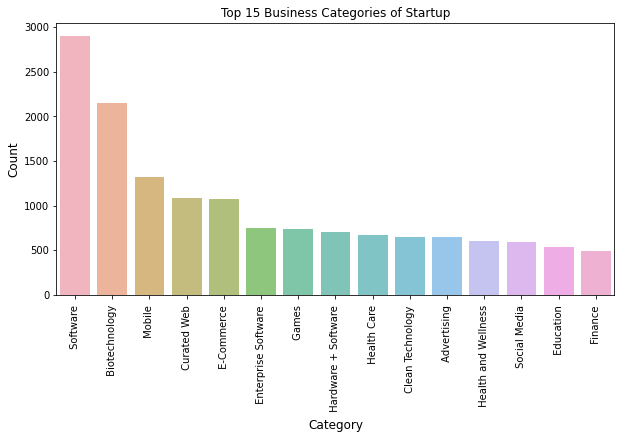

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 15 MAKRET 카테고리
categories_15  = df['market'].value_counts() # market 갯수 
categories_15 = categories_15[:15,] # 상위 15개 선택
plt.figure(figsize=(10,5)) # 플롯 크기 설정
sns.barplot(categories_15.index, categories_15.values, alpha=0.7) # alpha 투명도 설정
plt.title('Top 15 Business Categories of Startup') # 타이틀
plt.ylabel('Count', fontsize=12) # y axis label
plt.xlabel('Category', fontsize=12) # x axis label
plt.xticks(rotation=90) # category names rotation
plt.show()

대부분의 사업분야가 생활과 밀접하게 관련있으며 기술과 아이디어가 중요한 분야들이다.

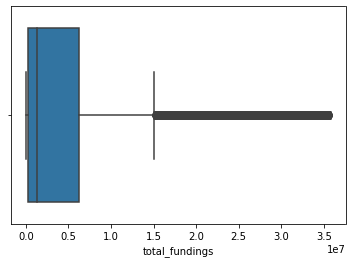

In [22]:
sns.boxplot(x=df['total_fundings'])

총 펀딩 금액은 15,000,000 까지를 정상범주로 보고 그 이상은 이상치로 분류했지만 이상치가 꽤나 많다.

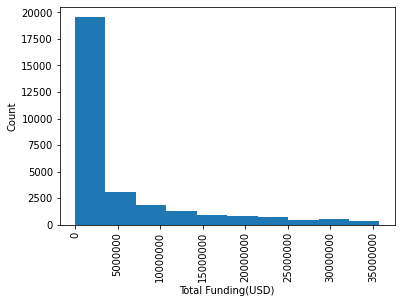

In [23]:
fig, ax = plt.subplots()
ax.hist(df['total_fundings'])
plt.ylabel('Count')
plt.xlabel('Total Funding(USD)')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=90) # names rotation
plt.show()

# 이상치를 제거하였을때 대부분이 250000 이하의 펀딩을 받았지만 그것보다 훨씬 큰 금액의 펀딩이 있음을 확인할 수 있다

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


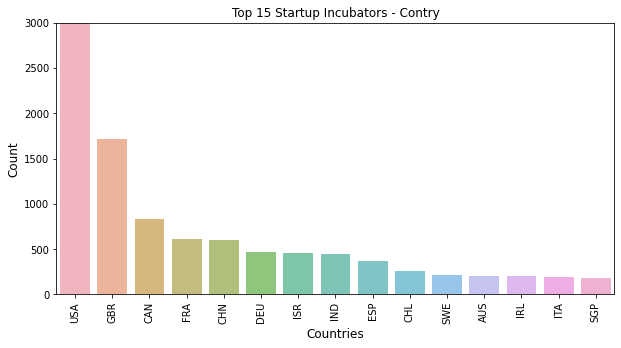

In [24]:
# Top 15 contries

countries  = df['country_code'].value_counts() # 국가별 스타트업 갯수 
countries = countries[:15,] # 상위 15개 선택
plt.figure(figsize=(10,5)) # 플롯 크기 설정
sns.barplot(countries.index, countries.values, alpha=0.7) # alpha 투명도 설정
plt.title('Top 15 Startup Incubators - Contry') # 타이틀
plt.ylabel('Count', fontsize=12) # y axis label
plt.xlabel('Countries', fontsize=12) # x axis label
plt.ylim(0,3000) # 미국 외 국가들의 스타트업 갯수 구별 위해 y축의 최고치를 3000으로 제한
plt.xticks(rotation=90) # category names rotation
plt.show()

스타트업이 많이 만들어진 나라는 주로 영미권이거나 서구 국가이며, 중국,인도,칠레,싱가폴만이 유일하게 비서구권 국가이다.

In [25]:
grouped = df['status'].groupby(by=df['country_code']) # 나라별로 묶어 status컬럼만 남김 

grouped = grouped.value_counts(normalize=True) # active, closed의 갯수 세어 새로운 series 생성
type(grouped)

top_contries_list = countries.index.tolist() # top 15 국가명을 리스트로

for i in top_contries_list: # 리스트에 있는 국가들의 active/closed 비율을 프린트
  print('국가:', i, grouped.loc[i])

국가: USA status
1    0.941712
0    0.058288
Name: status, dtype: float64
국가: GBR status
1    0.938336
0    0.061664
Name: status, dtype: float64
국가: CAN status
1    0.955795
0    0.044205
Name: status, dtype: float64
국가: FRA status
1    0.942717
0    0.057283
Name: status, dtype: float64
국가: CHN status
1    0.956811
0    0.043189
Name: status, dtype: float64
국가: DEU status
1    0.951168
0    0.048832
Name: status, dtype: float64
국가: ISR status
1    0.927313
0    0.072687
Name: status, dtype: float64
국가: IND status
1    0.966518
0    0.033482
Name: status, dtype: float64
국가: ESP status
1    0.940701
0    0.059299
Name: status, dtype: float64
국가: CHL status
1    0.992278
0    0.007722
Name: status, dtype: float64
국가: SWE status
1    0.948357
0    0.051643
Name: status, dtype: float64
국가: AUS status
1    0.965347
0    0.034653
Name: status, dtype: float64
국가: IRL status
1    0.934343
0    0.065657
Name: status, dtype: float64
국가: ITA status
1    0.964286
0    0.035714
Name: status, dtype: 

상위 15개 국가 중 칠레의 스타트업 생존율이 가장 높고 이스라엘이 가장 낮다.

# 기본모델 : 결정트리

In [26]:
from sklearn.model_selection import train_test_split # train/val/test set 나누기

target = 'status'
train, test = train_test_split(df, train_size=0.70, test_size=0.30, 
                              stratify=df[target], random_state=2)

train, val = train_test_split(train, train_size=0.60, test_size=0.40, 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((12327, 30), (8218, 30), (8805, 30))

In [27]:
train[target].value_counts(normalize=True) # train set 타겟 비율 확인

1    0.942159
0    0.057841
Name: status, dtype: float64

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline

features = train.drop(columns=[target]).columns #target인 status를 제외한 컬럼만 포함한 데이터프레임 만들기
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
df.dtypes

market                   object
status                    int64
country_code             object
founded_at               object
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
days_for_funding          int64
n_fundings                int64
total_fundings          float64
dtype: object

In [30]:
# oversampling 통해 상대적으로 적은 클래스 0의 비율 높이기
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler() 

X_train, y_train = rus.fit_resample(X_train, y_train)

In [31]:
# decision tree 모델 / ordinal encoder, simple imputer 사용
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    DecisionTreeClassifier(random_state=2, max_depth=15, class_weight='balanced')
)

pipe.fit(X_train, y_train);

In [32]:
y_train.value_counts(normalize=True) # 기업이 인수되거나 운영중인 경우 1, 폐업한 경우 0

1    0.5
0    0.5
Name: status, dtype: float64

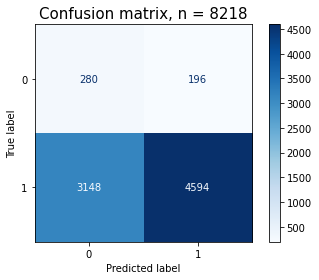

In [33]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# decison tree model- confusion matrix plot, val set
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [34]:
from sklearn.metrics import classification_report
# decison tree model, validation set - classification report
y_pred_val = pipe.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.08      0.59      0.14       476
           1       0.96      0.59      0.73      7742

    accuracy                           0.59      8218
   macro avg       0.52      0.59      0.44      8218
weighted avg       0.91      0.59      0.70      8218



기본모델은 우리가 목표로 하는 precision의 점수가 많이 낮다.

In [35]:
from sklearn.metrics import roc_auc_score

# validation auc_roc score
y_pred_proba = pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6154019926234507


기본모델의 AUC 점수는 0.5에 가까운 굉장히 낮은 성능을 보여준다.

Text(0, 0.5, 'TPR')

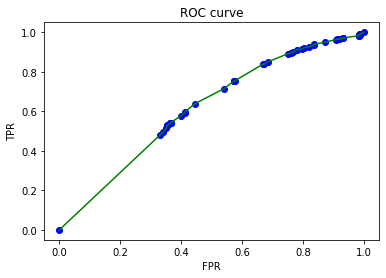

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# validation set roc curve plot
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

AUC 점수 0.54와 거의 직선에 가까운 ROC 곡선을 통해 이 모델은 성능이 거의 0에 가깝다는 것을 확인할 수 있다.

평가지표로 precison, AUC, ROC 커브를 사용한 이유는 클래스 1이 압도적으로 많기 때문에 단순히 accuracy만을 보는 것은 의미가 없고 모델이 얼마나 클래스를 잘 분류했는지 확인해볼 수 있는 auc score, roc curve가 더 유용하기 때문이다. precision의 경우 폐업이라고 예측한 경우 중 실제로 폐업한 경우를 맞춰야 폐업할 것 같은 기업에 투자를 피하기 위해 용이한 모델이 나올 것이라고 생각된다.


# Random Forest Model

In [37]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# random forest model 
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=2)
)

# random forest 하이퍼파라미터 dict
dists = {  
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 200), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__class_weight' : ['balanced', 'balanced_subsample']
}
# randomized search cross validation - random forest
clf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring= 'roc_auc',  
    n_jobs=-1
)
# random forest train
clf.fit(X_train, y_train);



In [38]:
print('최적 하이퍼파라미터: ', clf.best_params_)

최적 하이퍼파라미터:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 113, 'simpleimputer__strategy': 'most_frequent'}


In [39]:
# 최적 파라미터 모델 적용

pipe_rf = clf.best_estimator_

y_pred_rf = pipe_rf.predict(X_val)
# random forest roc_auc score
print(roc_auc_score(y_val, pipe_rf.predict_proba(X_val)[:,1]))


0.6179531487097552


In [40]:
# random forest validation classification report
y_pred_val = pipe_rf.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.11      0.04      0.05       476
           1       0.94      0.98      0.96      7742

    accuracy                           0.93      8218
   macro avg       0.53      0.51      0.51      8218
weighted avg       0.89      0.93      0.91      8218



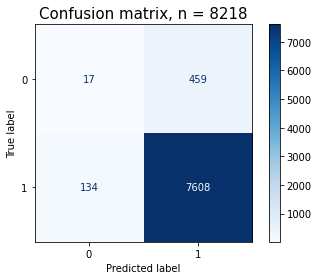

In [41]:
# confusion matrix plot - random forest

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [42]:
y_pred_proba = pipe_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6179531487097552


랜덤포레스트 모델의 경우 클래스 0의 precision은 소폭 높아졌는데 recall 점수가 낮아졌다. 결과적으로 f1 점수가 떨어져 분류 성능이 증가했다고 보긴 어려울 거 같다.

# XGBClassifier

In [43]:
from xgboost import XGBClassifier

# xgboost model 
pipe_xg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=200
                  , random_state=42
                  , max_depth=10
                  , learning_rate=0.2
                 )
)
# xgboost 하이퍼파라미터 dict
dists = {  
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'xgbclassifier__n_estimators': randint(50, 200), 
    'xgbclassifier__max_depth': [5, 10, 15, 20, None]
}
# xgboost-randomized search cross validation
clf = RandomizedSearchCV(
    pipe_xg, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring= 'roc_auc',  
    n_jobs=-1
)
# xgboost model train
clf.fit(X_train, y_train);




In [44]:
# 최적의 하이퍼 파라미터 적용
pipe_xg = clf.best_estimator_

y_pred_xg = pipe_xg.predict(X_val)

print('최적 하이퍼파라미터: ', clf.best_params_)


# xgboost model roc_auc score
print(roc_auc_score(y_val, pipe_xg.predict_proba(X_val)[:,1]))

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'most_frequent', 'xgbclassifier__max_depth': 20, 'xgbclassifier__n_estimators': 174}
0.6459174990068359


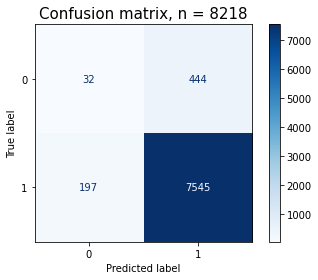

In [45]:
# confusion matrix plot-xgboost validation

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_xg, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [46]:
from sklearn.metrics import classification_report
# xgboost validation classification report
y_pred_val = pipe_xg.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.14      0.07      0.09       476
           1       0.94      0.97      0.96      7742

    accuracy                           0.92      8218
   macro avg       0.54      0.52      0.53      8218
weighted avg       0.90      0.92      0.91      8218



XGBclassifier 성능의 경우 랜덤포레스트와 같이 클래스 1은 잘 맞췄다. 내가 목표로 했던 클래스 0의 정밀도가 조금 올랐다. (클래스 0으로 예측을 원래 클래스 비율대비 많이 하지 않지만 하면 맞추는 경우가 더 늘었다.)

In [47]:
y_pred_proba = pipe_xg.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6459174990068359


분류모델의 전반적 성능을 평가하는 auc score도 랜덤포레스트와 비슷한 수준으로 상승했다.

# XGBClassifier 모델 TEST set 적용

In [48]:
# precision score 가 가장 높은 xg를 test set에 적용
y_pred_test_xg = pipe_xg.predict(X_test)
# test set roc_auc score
print(roc_auc_score(y_test, pipe_xg.predict_proba(X_test)[:,1]))


0.6182702785755653


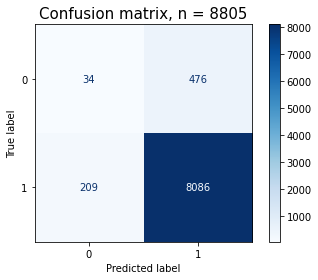

In [49]:
# test set confusion matrix
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_xg, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [50]:
# xgbclassifier test classification report
y_pred_test = pipe_xg.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.14      0.07      0.09       510
           1       0.94      0.97      0.96      8295

    accuracy                           0.92      8805
   macro avg       0.54      0.52      0.52      8805
weighted avg       0.90      0.92      0.91      8805



In [51]:
# roc auc score 계산
y_pred_proba = pipe_xg.predict_proba(X_test)[:, -1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba))

AUC score:  0.6182702785755653


클래스 0의 f1 스코어가 밸리데이션 셋에 적용했을때 보다 소폭 상승했다.

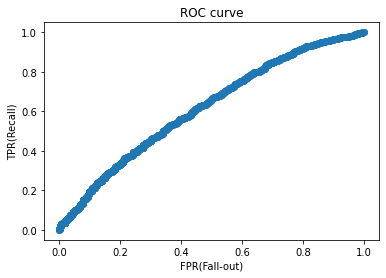

In [52]:
# roc 커브 그리기
y_pred_proba = pipe_xg.predict_proba(X_test)[:, -1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FRP' : fpr,
    'TPR' : tpr,
    'Threshold' : thresholds
})

roc

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

roc 커브도 거의 직선에 가깝긴 하지만 조금 굴곡져있어서 성능이 나아졌음을 확인할 수 있다.

# PDP

In [53]:
import matplotlib.pyplot as plt
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


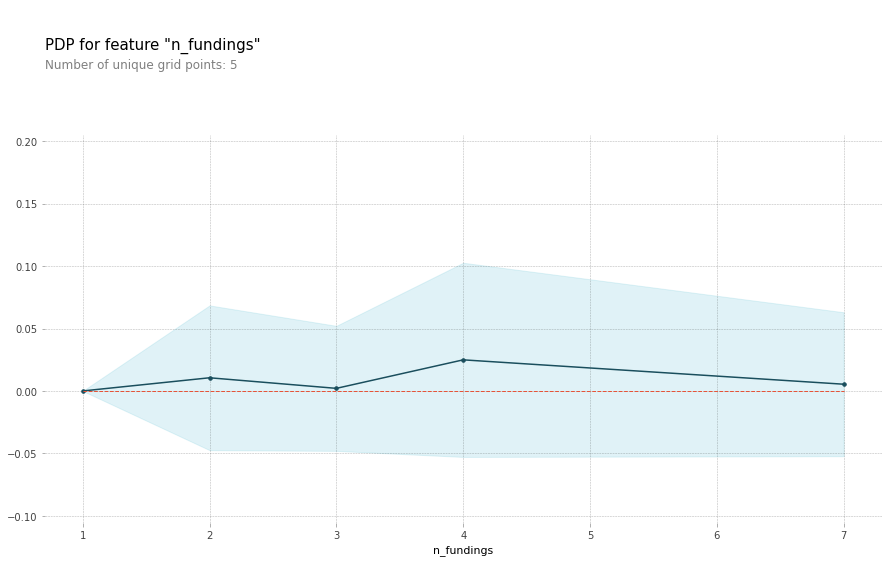

In [54]:
feature = 'n_fundings'

isolated = pdp_isolate(
    model=pipe_xg, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile'
    num_grid_points=50 # default=10
)
pdp_plot(isolated, feature_name=feature);

총 펀딩 받은 횟수는 4일때 가장 생존 확율이 높다.

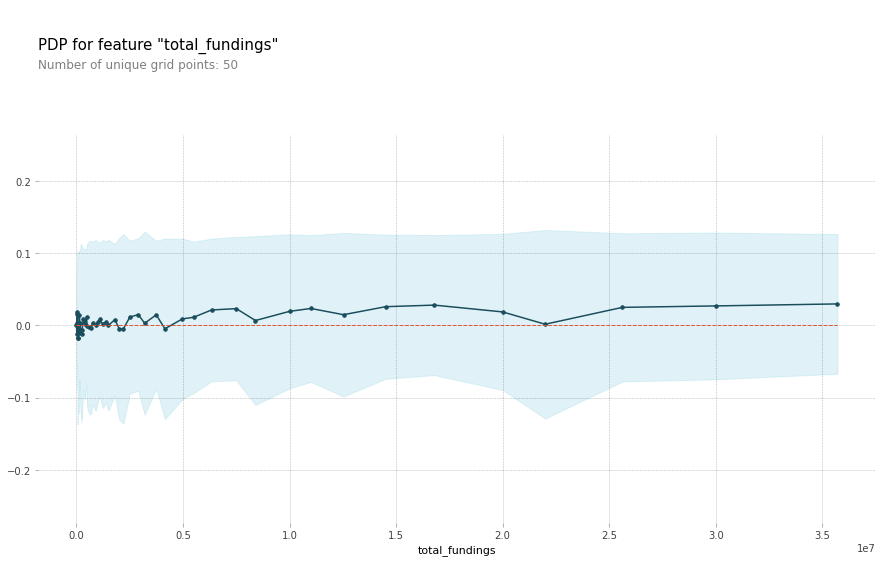

In [55]:
feature = 'total_fundings'

isolated = pdp_isolate(
    model=pipe_xg, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile'
    num_grid_points=50 # default=10
)
pdp_plot(isolated, feature_name=feature);

총 펀딩 금액은 굉장히 변동이 커서 어느 지점이 생존확율이 높고 낮음을 말하긴 어렵다.

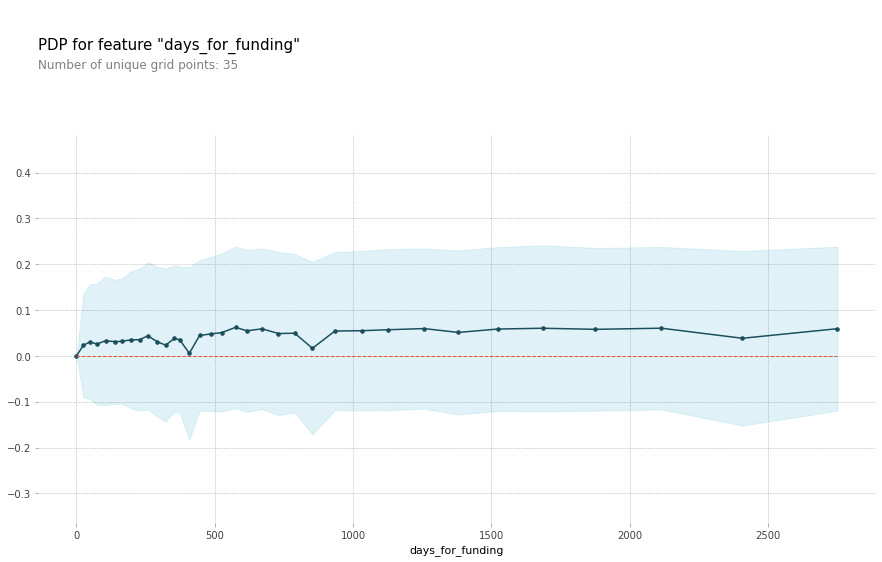

In [71]:
feature = 'days_for_funding'

isolated = pdp_isolate(
    model=pipe_xg, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile'
    num_grid_points=50 # default=10
)

pdp_plot(isolated, feature_name=feature);


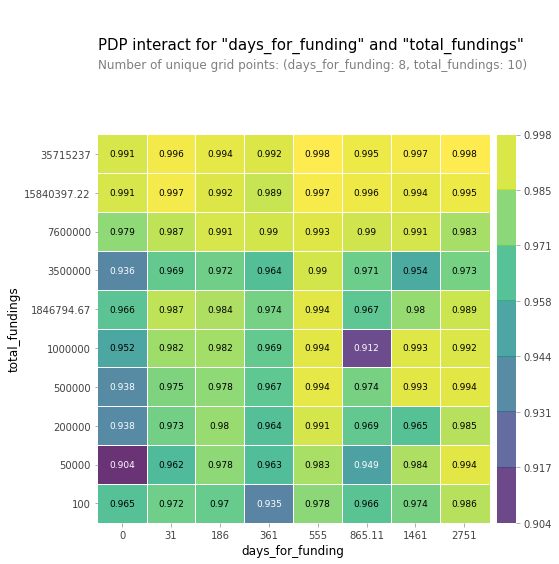

In [64]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
# 펀딩까지 기간과 펀딩 횟수로 pdp 인터랙트 플롯 그리기
features = ['days_for_funding', 'total_fundings']

interaction = pdp_interact(
    model=pipe_xg, 
    dataset=X_test,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

의외로 펀딩을 받기까지의 기간이 길수록 스타트업 생존확률이 높아지고 펀딩 받은 횟수도 많을수록 확률이 소폭 높아진다.

# permutation importance

In [57]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
# permuter를 위한 model 만들기
pipe_pm = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='mean'))),
    ('xg', XGBClassifier(max_depth=20, n_estimators=196, random_state=2, n_jobs=-1)) 
])

# permuter 만들기
permuter = PermutationImportance(
    pipe_pm.named_steps['xg'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)
# train set 훈련
pipe_pm.fit(X_train, y_train)
# test set 적용
X_test_transformed = pipe_pm.named_steps['preprocessing'].transform(X_test)
# permuter 적용
permuter.fit(X_test_transformed, y_test);

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()
# permutation importance plot
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names
)

Weight,Feature
0.0495 ± 0.0230,market
0.0216 ± 0.0179,days_for_funding
0.0186 ± 0.0169,total_fundings
0.0175 ± 0.0175,venture
0.0172 ± 0.0112,seed
0.0092 ± 0.0052,equity_crowdfunding
0.0081 ± 0.0123,country_code
0.0059 ± 0.0038,undisclosed
0.0056 ± 0.0032,private_equity
0.0027 ± 0.0012,product_crowdfunding


가장 중요한 feature를 확인해보면 market이 가장 높은데 소비자가 많이 찾는 분야일수록 생존확률이 더 높은게 아닐지 생각이 든다.

# shap value

In [58]:
from shap import TreeExplainer
import shap

shap.initjs()

row = X_test.iloc[[40]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row
ratio = 0.95/0.05


processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=100, verbosity=0, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=5)

[0]	validation_0-auc:0.631473	validation_1-auc:0.601426
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.631865	validation_1-auc:0.601737
[2]	validation_0-auc:0.633488	validation_1-auc:0.603746
[3]	validation_0-auc:0.633109	validation_1-auc:0.603055
[4]	validation_0-auc:0.644173	validation_1-auc:0.614103
[5]	validation_0-auc:0.653233	validation_1-auc:0.618602
[6]	validation_0-auc:0.652986	validation_1-auc:0.617081
[7]	validation_0-auc:0.651433	validation_1-auc:0.617666
[8]	validation_0-auc:0.653443	validation_1-auc:0.620737
[9]	validation_0-auc:0.657218	validation_1-auc:0.620849
[10]	validation_0-auc:0.661432	validation_1-auc:0.624229
[11]	validation_0-auc:0.66536	validation_1-auc:0.629797
[12]	validation_0-auc:0.664266	validation_1-auc:0.628838
[13]	validation_0-auc:0.665481	validation_1-auc:0.629544
[14]	validation_0-auc:0.666944	validation_1-auc:0.631456


XGBClassifier(scale_pos_weight=18.999999999999996, verbosity=0)

In [59]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

사업분야, 펀딩받기까지의 기간과 총 펀딩 금액이 모델이 이회사를 운영중이라고 판단할 확률이 높였으며 seed 펀딩을 받지 못한 점은 그 확률을 낮췄다.


In [60]:
model.predict(row_processed)

array([1])

In [69]:
row_50 = X_test.iloc[[50]]  
explainer = shap.TreeExplainer(model)
row_processed_50 = processor.transform(row_50)
shap_values = explainer.shap_values(row_processed_50)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)